In [1]:
import xgcm
import xarray as xr
import numpy as np
from xbasin import remap_vertical, compute_moc
from matplotlib import pyplot as plt
import cmocean as cm
%load_ext memory_profiler

We open the example data and create 2 grids: 1 for the dataset we have and 1 for the remapped one.
Here '_fr' means *from* and '_to' *to* (i.e. remapped data).

In [2]:
ds = xr.open_dataset('data/nemo_output_ex.nc')

from xnemogcm import open_nemo_and_domain_cfg
ds = open_nemo_and_domain_cfg(datadir='/home/romain/Documents/Education/PhD/Courses/2019-OC6310/Project/Experiments/EXP_eos00/Rawdata')
ds = ds.isel({'t':[0]}).drop_vars(
    ['depthw_bounds',
    't_bounds',
    'woce',
    'deptht_bounds',
    'rhop',
    'tos',
    'sos',
    'zos',
    'bn2',
    'mldr10_1',
    'relvor',
    'qsr',
    'qns',
    'empmr',
    'qt',
    'saltflx',
    'botpres',
    'depthu_bounds',
    'uos',
    'depthv_bounds',
    'vos',
    'nav_lon',
    'nav_lat',
    'jpiglo',
    'jpjglo',
    'jpkglo',
    'jperio',
    'ln_zco',
    'ln_zps',
    'ln_sco',
    'ln_isfcav',
    'top_level',
    'bottom_level',
    'stiffness',
    'ht_0',
    'hu_0',
    'hv_0',
    'tmask',
    'umask',
    'vmask',
    'fmask',
    'tmaskutil',
    'umaskutil',
    'vmaskutil',
    'mbathy',
    'misf',
    'isfdraft',
    'fmaskutil']
)
ds

<xarray.Dataset>
Dimensions:   (t: 1, x_c: 21, x_f: 21, y_c: 40, y_f: 40, z_c: 36, z_f: 36)
Coordinates:
  * z_f       (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 30.5 31.5 32.5 33.5 34.5
  * t         (t) object 7756-01-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * y_c       (y_c) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38 39
  * z_c       (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35
  * x_f       (x_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 16.5 17.5 18.5 19.5 20.5
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5
Data variables:
    e3w       (t, z_f, y_c, x_c) float32 ...
    e3t       (t, z_c, y_c, x_c) float32 ...
    thetao    (t, z_c, y_c, x_c) float32 ...
    so        (t, z_c, y_c, x_c) float32 ...
    e3u       (t, z_c, y_c, x_f) float32 ...
    uo        (t, z_c, y_c, x_f) float32 ...
    e3v       (t, z_c, y_f, x_c) float32 ...
    vo        (t, z_c, y_f, x_c) float32 ...
    glamt     (y_c, x_c) float64 ...
    glamu     (y_c, x_f) float64 ...
    glamv     (y_f, x_c) float64 ...
    glamf     (y_f, x_f) float64 ...
    gphit     (y_c, x_c) float64 ...
    gphiu     (y_c, x_f) float64 ...
    gphiv     (y_f, x_c) float64 ...
    gphif     (y_f, x_f) float64 ...
    e1t       (y_c, x_c) float64 ...
    e1u       (y_c, x_f) float64 ...
    e1v       (y_f, x_c) float64 ...
    e1f       (y_f, x_f) float64 ...
    e2t       (y_c, x_c) float64 ...
    e2u       (y_c, x_f) float64 ...
    e2v       (y_f, x_c) float64 ...
    e2f       (y_f, x_f) float64 ...
    ff_f      (y_f, x_f) float64 ...
    ff_t      (y_c, x_c) float64 ...
    e3t_1d    (z_c) float64 ...
    e3w_1d    (z_f) float64 ...
    e3t_0     (z_c, y_c, x_c) float64 ...
    e3u_0     (z_c, y_c, x_f) float64 ...
    e3v_0     (z_c, y_f, x_c) float64 ...
    e3f_0     (z_c, y_f, x_f) float64 ...
    e3w_0     (z_f, y_c, x_c) float64 ...
    e3uw_0    (z_f, y_c, x_f) float64 ...
    e3vw_0    (z_f, y_f, x_c) float64 ...
    gdept_0   (z_c, y_c, x_c) float64 ...
    gdepw_0   (z_f, y_c, x_c) float64 ...
    gdept_1d  (z_c) float64 ...
    gdepw_1d  (z_f) float64 ...
Attributes:
    DOMAIN_number_total:     1
    DOMAIN_number:           1
    DOMAIN_dimensions_ids:   [1 2]
    DOMAIN_size_global:      [21 40]
    DOMAIN_size_local:       [21 40]
    DOMAIN_position_first:   [1 1]
    DOMAIN_position_last:    [21 40]
    DOMAIN_halo_size_start:  [0 0]
    DOMAIN_halo_size_end:    [0 0]
    DOMAIN_type:             BOX
    nn_cfg:                  2
    cn_cfg:                  BASIN
    name:                    NEMO dataset 
    description:             Ocean grid variables, set on the proper positions
    title:                   Ocean grid variables

In [3]:
metrics_fr = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w']
}
metrics_to = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t_1d', 'e3w_1d']
}
grid_fr = xgcm.Grid(ds, periodic=False, metrics=metrics_fr)
grid_to = xgcm.Grid(ds, periodic=False, metrics=metrics_to)

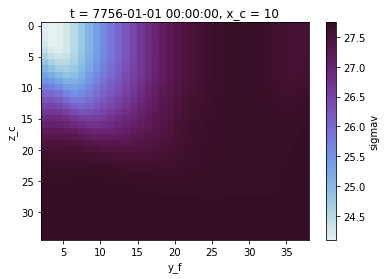

In [4]:
from xbasin.eos import compute_rho

rho = compute_rho(
    grid_fr.interp(ds.thetao,axis='Y', boundary='extrapolate'),
    grid_fr.interp(ds.so, axis='Y', boundary='extrapolate'),
    0,
    lambda1=4.9520e-2
) - 1000

ds['sigmav'] = rho

ds['sigmav'][{'t':0,'y_f':slice(2,-2),'x_c':10, 'z_c':slice(None,-1)}].plot(cmap=cm.cm.dense)
plt.gca().invert_yaxis()

In [5]:
from xbasin import create_density_grid

ds = create_density_grid(
    ds,
    dd=0.01,
    rho=ds['sigmav']
)

metrics = {
    ('X',): ['e1t', 'e1u', 'e1v', 'e1f'],
    ('Y',): ['e2t', 'e2u', 'e2v', 'e2f'],
    ('Z',): ['e3t', 'e3u', 'e3v', 'e3w'],
    ('S',): ['e3t_s_1d', 'e3w_s_1d']
}
grid = xgcm.Grid(ds, periodic=False, metrics=metrics)
print(grid)
ds

<xgcm.Grid>
Y Axis (not periodic):
  * center   y_c --> right
  * right    y_f --> center
T Axis (not periodic):
  * center   t
Z Axis (not periodic):
  * center   z_c --> left
  * left     z_f --> center
X Axis (not periodic):
  * center   x_c --> right
  * right    x_f --> center
S Axis (not periodic):
  * center   s_c --> left
  * left     s_f --> center


<xarray.Dataset>
Dimensions:   (s_c: 501, s_f: 501, t: 1, x_c: 21, x_f: 21, y_c: 40, y_f: 40, z_c: 36, z_f: 36)
Coordinates:
  * z_f       (z_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 30.5 31.5 32.5 33.5 34.5
  * t         (t) object 7756-01-01 00:00:00
  * x_c       (x_c) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
  * y_c       (y_c) int64 0 1 2 3 4 5 6 7 8 9 ... 30 31 32 33 34 35 36 37 38 39
  * z_c       (z_c) int64 0 1 2 3 4 5 6 7 8 9 ... 26 27 28 29 30 31 32 33 34 35
  * x_f       (x_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 16.5 17.5 18.5 19.5 20.5
  * y_f       (y_f) float64 0.5 1.5 2.5 3.5 4.5 5.5 ... 35.5 36.5 37.5 38.5 39.5
  * s_c       (s_c) float64 0.0 1.0 2.0 3.0 4.0 ... 497.0 498.0 499.0 500.0
  * s_f       (s_f) float64 -0.5 0.5 1.5 2.5 3.5 ... 496.5 497.5 498.5 499.5
Data variables:
    e3w       (t, z_f, y_c, x_c) float32 10.0 10.000818 ... 175.41342 237.11617
    e3t       (t, z_c, y_c, x_c) float32 10.0 10.000818 ... 177.88142 240.50479
    thetao    (t, z_c, y_c, x_c) float32 0.0 24.280985 24.146835 ... 0.0 0.0 0.0
    so        (t, z_c, y_c, x_c) float32 0.0 36.284115 36.256695 ... 0.0 0.0 0.0
    e3u       (t, z_c, y_c, x_f) float32 10.0 10.000794 ... 209.1931 209.1931
    uo        (t, z_c, y_c, x_f) float32 0.0 -0.0022189368 ... 0.0 0.0
    e3v       (t, z_c, y_f, x_c) float32 10.0 10.00081 ... 200.46074 208.99274
    vo        (t, z_c, y_f, x_c) float32 0.0 0.002918852 ... 0.0 0.0
    glamt     (y_c, x_c) float64 -1.0 1.0 3.0 5.0 7.0 ... 33.0 35.0 37.0 39.0
    glamu     (y_c, x_f) float64 0.0 2.0 4.0 6.0 8.0 ... 34.0 36.0 38.0 40.0
    glamv     (y_f, x_c) float64 -1.0 1.0 3.0 5.0 7.0 ... 33.0 35.0 37.0 39.0
    glamf     (y_f, x_f) float64 0.0 2.0 4.0 6.0 8.0 ... 34.0 36.0 38.0 40.0
    gphit     (y_c, x_c) float64 -2.0 -2.0 -2.0 -2.0 ... 60.27 60.27 60.27 60.27
    gphiu     (y_c, x_f) float64 -2.0 -2.0 -2.0 -2.0 ... 60.27 60.27 60.27 60.27
    gphiv     (y_f, x_c) float64 -0.9999 -0.9999 -0.9999 ... 60.76 60.76 60.76
    gphif     (y_f, x_f) float64 -0.9999 -0.9999 -0.9999 ... 60.76 60.76 60.76
    e1t       (y_c, x_c) float64 2.223e+05 2.223e+05 ... 1.103e+05 1.103e+05
    e1u       (y_c, x_f) float64 2.223e+05 2.223e+05 ... 1.103e+05 1.103e+05
    e1v       (y_f, x_c) float64 2.224e+05 2.224e+05 ... 1.086e+05 1.086e+05
    e1f       (y_f, x_f) float64 2.224e+05 2.224e+05 ... 1.086e+05 1.086e+05
    e2t       (y_c, x_c) float64 2.223e+05 2.223e+05 ... 1.103e+05 1.103e+05
    e2u       (y_c, x_f) float64 2.223e+05 2.223e+05 ... 1.103e+05 1.103e+05
    e2v       (y_f, x_c) float64 2.224e+05 2.224e+05 ... 1.086e+05 1.086e+05
    e2f       (y_f, x_f) float64 2.224e+05 2.224e+05 ... 1.086e+05 1.086e+05
    ff_f      (y_f, x_f) float64 -2.545e-06 -2.545e-06 ... 0.0001273 0.0001273
    ff_t      (y_c, x_c) float64 -5.089e-06 -5.089e-06 ... 0.0001266 0.0001266
    e3t_1d    (z_c) float64 10.0 10.0 10.0 10.0 10.0 ... 365.0 393.2 420.1 439.2
    e3w_1d    (z_f) float64 10.0 10.0 10.0 10.0 10.0 ... 350.5 379.2 406.8 432.9
    e3t_0     (z_c, y_c, x_c) float64 10.0 10.0 10.0 10.0 ... 145.7 177.9 240.5
    e3u_0     (z_c, y_c, x_f) float64 10.0 10.0 10.0 10.0 ... 161.8 209.2 209.2
    e3v_0     (z_c, y_f, x_c) float64 10.0 10.0 10.0 10.0 ... 196.1 200.5 209.0
    e3f_0     (z_c, y_f, x_f) float64 10.0 10.0 10.0 10.0 ... 198.3 204.7 204.7
    e3w_0     (z_f, y_c, x_c) float64 10.0 10.0 10.0 10.0 ... 143.7 175.4 237.1
    e3uw_0    (z_f, y_c, x_f) float64 10.0 10.0 10.0 10.0 ... 159.6 206.3 206.3
    e3vw_0    (z_f, y_f, x_c) float64 10.0 10.0 10.0 10.0 ... 193.3 197.7 206.1
    gdept_0   (z_c, y_c, x_c) float64 5.0 5.0 5.0 ... 1.867e+03 2.431e+03
    gdepw_0   (z_f, y_c, x_c) float64 0.0 0.0 0.0 ... 1.778e+03 2.31e+03
    gdept_1d  (z_c) float64 5.0 15.0 25.0 35.0 ... 3.38e+03 3.787e+03 4.22e+03
    gdepw_1d  (z_f) float64 0.0 10.0 20.0 30.0 ... 3.187e+03 3.58e+03 4e+03
    sigmav    (t, z_c, y_f, x_c) float32 0.45135498 23.756287 ... 0.45135498
    e3t_s_1d  float64 0.01
    e3w_s_1d  float64 0.01
    

In [6]:
def compute_zonal_mean_depth_isopycnal(
    rho, density_levels, depth, grid, X="X", z_c="z_c", s_f="s_f"
):
    max_index = rho.coords[z_c].shape[0] - 1  # start at 0
    #print(max_index)

    mean_depth_isopycnal = (
        density_levels * grid.average(rho, axis=X).min(dim=z_c) * np.NaN
    )  # dirty way of doing
    #print(mean_depth_isopycnal)

    for (i, sigma) in enumerate(density_levels):
        rho_less_sigma = rho <= sigma
        upper_t_point_index = xr.where(
            rho_less_sigma.sum(dim=z_c) > max_index,
            max_index,
            rho_less_sigma.sum(dim=z_c),
        )
        upper_t_point_index = xr.where(
            sigma < rho.isel({z_c: slice(None, -1)}).min(dim=z_c),
            0,
            upper_t_point_index,
        )
        upper_t_point_index = xr.where(
            sigma > rho.isel({z_c: slice(None, -1)}).max(dim=z_c),
            max_index,
            upper_t_point_index,
        )

        rho_greater_sigma = rho >= sigma
        lower_t_point_index = xr.where(
            max_index - rho_greater_sigma.sum(dim=z_c) < 0,
            0,
            max_index - rho_greater_sigma.sum(dim=z_c),
        )
        lower_t_point_index = xr.where(
            sigma < rho.isel({z_c: slice(None, -1)}).min(dim=z_c),
            0,
            lower_t_point_index,
        )
        lower_t_point_index = xr.where(
            sigma > rho.isel({z_c: slice(None, -1)}).max(dim=z_c),
            max_index,
            lower_t_point_index,
        )

        depth_up = depth.isel({z_c: upper_t_point_index})
        depth_down = depth.isel({z_c: lower_t_point_index})

        mean_depth_isopycnal[{s_f: i}] = grid.average(
            (depth_up + depth_down) / 2, axis=X
        )
    return mean_depth_isopycnal

In [17]:
rho = 26

We will now try to get the upper and lower levels of density in the ocean, compared to given value of rho

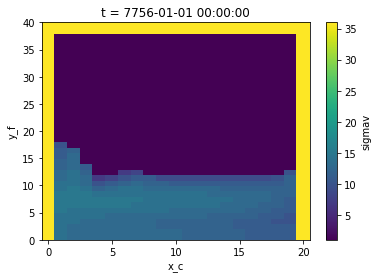

In [18]:
(ds.sigmav < rho).sum(dim='z_c').plot()

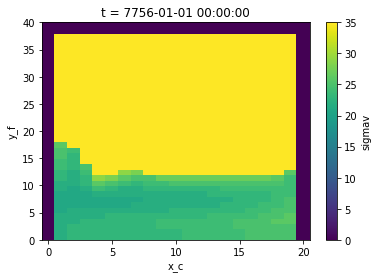

In [19]:
(ds.sigmav > rho).sum(dim='z_c').plot()

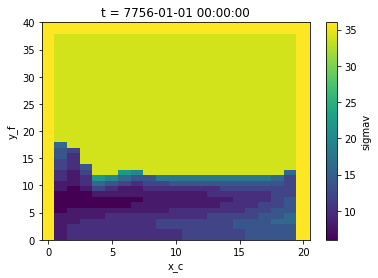

In [24]:
np.abs((ds.sigmav > rho).sum(dim='z_c') - (ds.sigmav < rho).sum(dim='z_c')).plot()